In [1]:
from prody import *


In [2]:
from pylab import *


In [3]:
protein = parsePDB('7pw1')


@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 7pw1 downloaded (7pw1.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2657 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 207 residues.


In [4]:
selection = protein.select('name CA')


In [5]:
gnm = GNM('7pw1')


In [6]:
gnm.buildKirchhoff(selection)


@> Kirchhoff was built in 0.01s.


In [7]:
gnm.calcModes(n_modes='all')


@> 291 modes were calculated in 0.03s.


In [8]:
from prody import calcDynamicFlexibilityIndex

In [9]:
atoms = selection


In [10]:
select = 'protein'

In [11]:
dfi = calcDynamicFlexibilityIndex(gnm, atoms, select)

In [12]:
with open('dfi.npy', 'wb')as f:
    ...:     np.save(f, dfi)


In [13]:
print(dfi)


[ 1.01282051  1.87179487 -0.1025641   1.30769231  1.74358974  2.
  2.05128205  2.76923077  3.02564103  3.17948718  2.71794872  2.66666667
  1.94871795  2.20512821  2.82051282  2.46153846  2.87179487  2.41025641
  2.66666667  2.76923077  2.56410256  2.51282051  2.61538462  2.76923077
  3.07692308  2.20512821  1.53846154  1.38461538  1.38461538  1.23076923
  1.1025641   0.84615385  1.12820513  0.74358974  0.83333333  1.42948718
  2.02564103  2.02564103  2.02564103  1.87179487  1.70512821  1.6025641
  1.51282051  1.37179487  1.76923077  1.79487179  1.87179487  2.
  2.25641026  2.76923077  3.23076923  2.48717949  2.1025641   2.15384615
  2.25641026  1.8974359   2.02564103  2.15384615  2.25641026  1.61538462
  1.71794872  1.79487179  2.15384615  2.64102564  2.79487179  2.71794872
  2.46153846  1.94871795  1.28205128  1.33333333  0.20512821  0.53846154
  0.24358974 -0.71794872 -0.92307692 -0.44871795 -0.23076923 -1.45512821
 -2.05128205 -1.79487179 -0.61538462 -0.17948718 -0.38461538  0.2051

In [14]:
resnames_and_nums = list(zip(atoms.getResnames(), atoms.getResnums()))


dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]
dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]


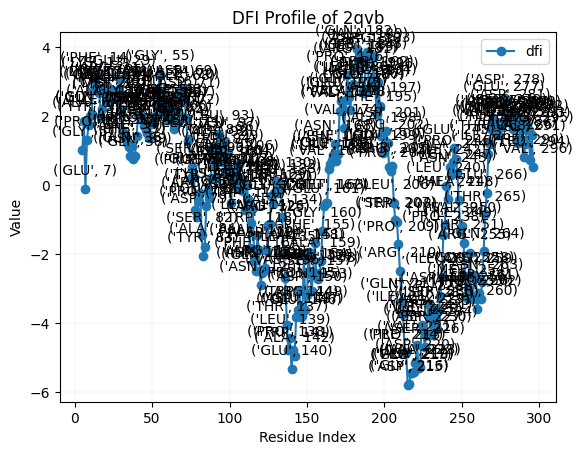

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
    ...: import numpy as np
    ...: 
    ...: 
    ...: fig, ax = plt.subplots()
    ...: 
    ...: x_values = np.arange(5, 5 + len(dfi))
    ...: 
    ...: 
    ...: ax.plot(x_values, dfi, label='dfi', marker='o')
    ...: 
    ...: 
    ...: 
    ...: for i, value in enumerate(dfi_residues):
    ...:     ax.annotate(value, (i+5, dfi[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ...: 
    ...: grid(b=True, which='both', axis='both', linewidth=0.08)
    ...: x = np.linspace(0, 10, 20)
    ...: plt.xticks(np.arange(min(x), max(x)+300, 50))
    ...: 
    ...: 
    ...: y = np.linspace(0, 10, 100)
    ...: 
    ...: 
    ...: 
    ...: 
    ...: ax.legend()
    ...: ax.set_xlabel('Residue Index')
    ...: ax.set_ylabel('Value')
    ...: ax.set_title('DFI Profile of 2qvb')
    ...: plt.figure(figsize=(20, 10))

    ...: 

    ...: plt.show()

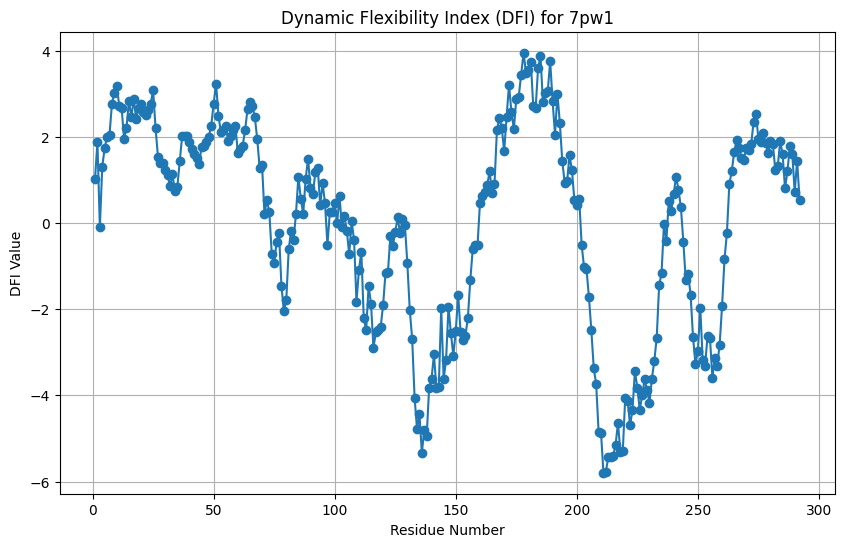

In [16]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 
    ...: 
    ...: dfi_values = np.load('dfi.npy')
    ...: 
    ...: 
    ...: residues = np.arange(1, len(dfi_values) + 1)
    ...: 
    ...: 
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dfi_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DFI Value')
    ...: plt.title('Dynamic Flexibility Index (DFI) for 7pw1')
    ...: plt.grid(True)
    ...: plt.show()


In [17]:
writePDB('7pw1_DFI.pdb', selection, beta=dfi)

'7pw1_DFI.pdb'

In [18]:
for (resname, resnum), value in zip(resnames_and_nums, dfi):
    print(f"Residue {resnum} ({resname}): dfi = {value}")

Residue 5 (GLY): dfi = 1.0128205128205128
Residue 6 (ALA): dfi = 1.8717948717948718
Residue 7 (GLU): dfi = -0.10256410256410256
Residue 8 (PRO): dfi = 1.3076923076923077
Residue 9 (TYR): dfi = 1.7435897435897436
Residue 10 (GLY): dfi = 2.0
Residue 11 (GLN): dfi = 2.051282051282051
Residue 12 (LYS): dfi = 2.769230769230769
Residue 13 (LYS): dfi = 3.0256410256410255
Residue 14 (PHE): dfi = 3.1794871794871793
Residue 15 (ILE): dfi = 2.717948717948718
Residue 16 (GLU): dfi = 2.6666666666666665
Residue 17 (ILE): dfi = 1.9487179487179487
Residue 18 (ALA): dfi = 2.2051282051282053
Residue 19 (GLY): dfi = 2.8205128205128207
Residue 20 (LYS): dfi = 2.4615384615384617
Residue 21 (ARG): dfi = 2.871794871794872
Residue 22 (MET): dfi = 2.41025641025641
Residue 23 (ALA): dfi = 2.6666666666666665
Residue 24 (TYR): dfi = 2.769230769230769
Residue 25 (ILE): dfi = 2.5641025641025643
Residue 26 (ASP): dfi = 2.5128205128205128
Residue 27 (GLU): dfi = 2.6153846153846154
Residue 28 (GLY): dfi = 2.7692307692

In [32]:
for (resname, resnum), value in zip(resnames_and_nums, dfi):
    
    abs_value = abs(value)
    print(f"Residue {resnum} ({resname}): dfi = {abs_value}")


Residue 5 (GLY): dfi = 1.0128205128205128
Residue 6 (ALA): dfi = 1.8717948717948718
Residue 7 (GLU): dfi = 0.10256410256410256
Residue 8 (PRO): dfi = 1.3076923076923077
Residue 9 (TYR): dfi = 1.7435897435897436
Residue 10 (GLY): dfi = 2.0
Residue 11 (GLN): dfi = 2.051282051282051
Residue 12 (LYS): dfi = 2.769230769230769
Residue 13 (LYS): dfi = 3.0256410256410255
Residue 14 (PHE): dfi = 3.1794871794871793
Residue 15 (ILE): dfi = 2.717948717948718
Residue 16 (GLU): dfi = 2.6666666666666665
Residue 17 (ILE): dfi = 1.9487179487179487
Residue 18 (ALA): dfi = 2.2051282051282053
Residue 19 (GLY): dfi = 2.8205128205128207
Residue 20 (LYS): dfi = 2.4615384615384617
Residue 21 (ARG): dfi = 2.871794871794872
Residue 22 (MET): dfi = 2.41025641025641
Residue 23 (ALA): dfi = 2.6666666666666665
Residue 24 (TYR): dfi = 2.769230769230769
Residue 25 (ILE): dfi = 2.5641025641025643
Residue 26 (ASP): dfi = 2.5128205128205128
Residue 27 (GLU): dfi = 2.6153846153846154
Residue 28 (GLY): dfi = 2.76923076923

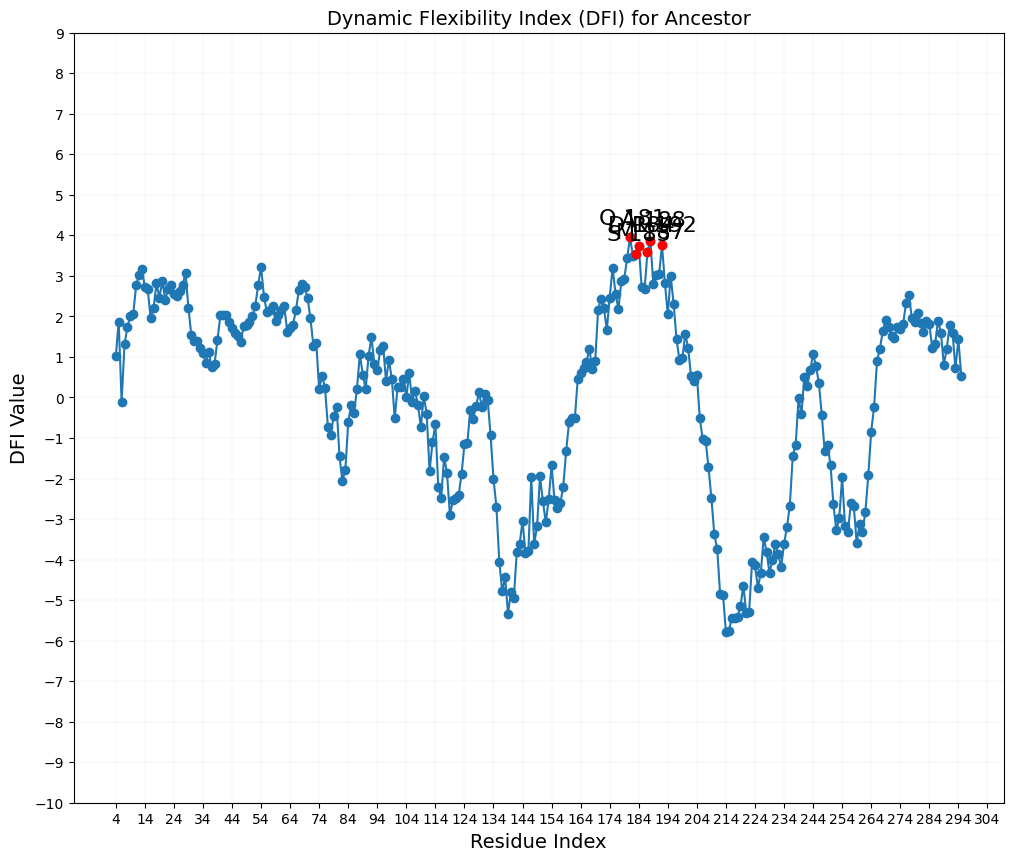

In [21]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}
    ...: 
    ...: dfi_values = np.load('dfi.npy')
    ...: fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

x_values = np.arange(4, 4 + len(dfi_values))

ax.plot(x_values, dfi_values, marker='o', linestyle='-')

subset_color = 'red'
for i, value_tuple in enumerate(dfi_residues):
    if  dfi_values[i] >= 3.5:
        
        value = value_tuple[0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
        
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, dfi_values[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, dfi_values[i], marker='o', linestyle='', color=subset_color)

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 10))

y = np.linspace(-10, 10, 100)
plt.yticks(np.arange(min(y), max(y), 1))

ax.set_xlabel('Residue Index', fontsize=14)
ax.set_ylabel('DFI Value', fontsize=14)
ax.set_title('Dynamic Flexibility Index (DFI) for Ancestor', fontsize=14)

plt.show()